## GRAVITY COMPENSATION

In [34]:
import pandas as pd

# Beispiel: Lesen der Daten aus einer Datei
# Pfad zur Datei
file_path = "data_1.txt"
# "C:\Users\bernh\Downloads\drive-download-20240908T150007Z-001\WitMotion New Software\WitMotion(V2024.8.12.4)\Record\2024-09-15\05-11-18-527\data_0.txt"
# Daten in den DataFrame laden, mit Tabulator als Trennzeichen
# df = pd.read_csv(file_path,'r', encoding='utf-8', sep='\t', index_col=False)
# Datei öffnen und lesen
df = pd.read_csv(file_path, sep='\t', index_col=False)

# Überprüfen der Spaltennamen nach dem Zurücksetzen des Index
# print("Spaltennamen nach Index-Zurücksetzung:", df.columns)

# Die ersten paar Zeilen nach der Anpassung anzeigen
# print(df.head(2))

#_# Ersetzen von Kommas durch Punkte in spezifischen Spalten
#_df['Chip Time()'] = df['Chip Time()'].str.replace(',', '.').astype(float)
#_# ACCELERATION:
df['Acceleration X(g)'] = df['Acceleration X(g)'].str.replace(',', '.').astype(float)
df['Acceleration Y(g)'] = df['Acceleration Y(g)'].str.replace(',', '.').astype(float)
df['Acceleration Z(g)'] = df['Acceleration Z(g)'].str.replace(',', '.').astype(float)
#_# ANGELS
df['Angle X(°)'] = df['Angle X(°)'].str.replace(',', '.').astype(float)
df['Angle Y(°)'] = df['Angle Y(°)'].str.replace(',', '.').astype(float)
df['Angle Z(°)'] = df['Angle Z(°)'].str.replace(',', '.').astype(float)
# ANGULAR VELOSITY
df['Angular velocity X(°/s)'] = df['Angular velocity X(°/s)'].str.replace(',', '.').astype(float)
df['Angular velocity Y(°/s)'] = df['Angular velocity Y(°/s)'].str.replace(',', '.').astype(float)
df['Angular velocity Z(°/s)'] = df['Angular velocity Z(°/s)'].str.replace(',', '.').astype(float)
df.head(2)

,Time,Device name,Chip Time(),Acceleration X(g),Acceleration Y(g),Acceleration Z(g),Angular velocity X(°/s),Angular velocity Y(°/s),Angular velocity Z(°/s),Angle X(°),Angle Y(°),Angle Z(°),Magnetic field X(ʯt),Magnetic field Y(ʯt),Magnetic field Z(ʯt),Temperature(℃),Pressure(Pa),Height(m),Longitude(),Latitude(),GPS ground speed(km),Angle of course(°),GPS height(m),Number of satellites(),Position location(),Horizontal position(),Vertical position(),Quaternions 0(),Quaternions 1(),Quaternions 2(),Quaternions 3()
0,15:32:07.831,COM12,NaN,-0.095,0.013,1.005,0.0,0.0,0.0,0.577,5.350,-59.557,"81,367","73,346","64,935","20,04",96600,"402,67",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15:32:07.929,COM12,NaN,-0.095,0.013,1.004,0.0,0.0,0.0,0.577,5.345,-59.540,"81,367","73,333","64,948","20,06",96600,"402,67",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Berechne die Summe der Beschleunigungen (X, Y, Z) für jede Zeile der ersten 20 Zeilen
df['Sum Acceleration (g)'] = df[['Acceleration X(g)', 'Acceleration Y(g)', 'Acceleration Z(g)']].sum(axis=1)

# Optional: Nur die ersten 20 Zeilen anzeigen
df_first_20 = df.head(20)

# Ausgabe der ersten 20 Zeilen mit der Summenspalte
print(df_first_20['Sum Acceleration (g)'])

0     0.923
1     0.922
2     0.923
3     0.922
4     0.927
5     0.921
6     0.926
7     0.879
8     0.856
9     0.830
10    0.757
11    0.663
12    0.583
13    0.525
14    0.427
15    0.269
16    0.160
17    0.138
18    0.058
19   -0.104
Name: Sum Acceleration (g), dtype: float64


## KALIBRIERE DEN SENSOR

<h4><b>Purpose:</h4></b>
The accelerometer calibration is used to remove the zero bias of the <br> 
accelerometer. Before calibration, there will be different degrees of <br> 
bias error. <p> <span style = "background-color:red;">After calibration, the measurement will be accurate.</span></p>

https://m.media-amazon.com/images/I/B1zDYGUvUhS.pdf

Seite 14

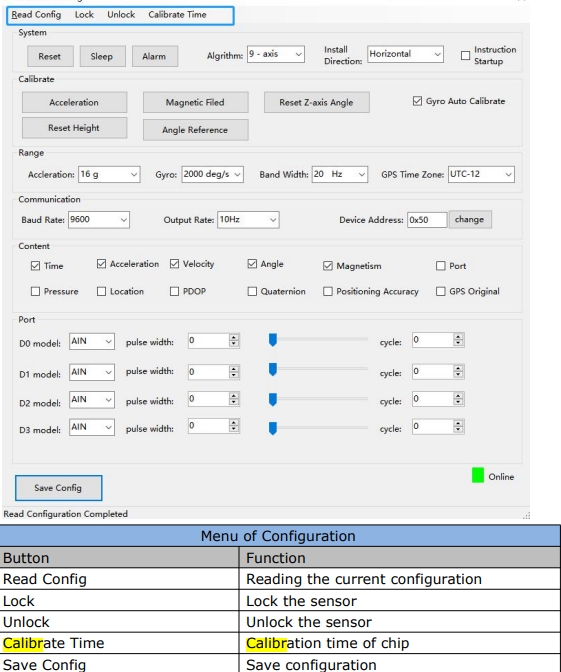

Methods:
Step 1. Keep the module horizontally stationary
Step 2. Click the accelerometer calibration
Step 3. Click the “Start calibration”and wait 

In [36]:
import numpy as np
import pandas as pd

# Beispiel: Ein bestehender DataFrame mit den spezifizierten Spaltennamen
data = {
    'Angle X(°)': np.linspace(0, 90, 10),  # Beispielwerte für Pitch (Angle X) in Grad
    'Angle Y(°)': np.linspace(0, 90, 10),  # Beispielwerte für Roll (Angle Y) in Grad
    'Angle Z(°)': np.linspace(0, 360, 10), # Beispielwerte für Yaw (Angle Z) in Grad
    'Acceleration X(g)': np.random.uniform(-1, 1, 10),  # Zufällige Beschleunigungswerte in g
    'Acceleration Y(g)': np.random.uniform(-1, 1, 10),
    'Acceleration Z(g)': np.random.uniform(-1, 1, 10)
}

# DataFrame erstellen
# df = pd.DataFrame(data)

# Konstante für die Erdbeschleunigung (9.81 m/s²)
g = 9.81

# Berechne die Schwerkraftkomponente (Gravitationsbeschleunigung) in Abhängigkeit von Pitch, Roll und Yaw
def compute_gravity_components(pitch_deg, roll_deg, yaw_deg):
    # Konvertiere Winkel von Grad in Bogenmaß
    pitch = np.radians(pitch_deg)
    roll = np.radians(roll_deg)
    yaw = np.radians(yaw_deg)

    # Berechne die Rotationsmatrizen für Pitch, Roll und Yaw
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(pitch), -np.sin(pitch)],
        [0, np.sin(pitch), np.cos(pitch)]
    ])

    R_y = np.array([
        [np.cos(roll), 0, np.sin(roll)],
        [0, 1, 0],
        [-np.sin(roll), 0, np.cos(roll)]
    ])

    R_z = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])

    # Gesamte Rotationsmatrix
    R = R_z @ R_y @ R_x

    # Erdbeschleunigungsvektor (im Ruhezustand nur in Z-Richtung)
    gravity = np.array([0, 0, g])

    # Berechne die Schwerkraftkomponente in den neuen Achsen
    gravity_components = R @ gravity
    return gravity_components

# Berechne für jede Zeile die Schwerkraftkomponente und subtrahiere sie von den gemessenen Beschleunigungen
gravity_corrected_acc = []
for index, row in df.iterrows():
    pitch, roll, yaw = row['Angle X(°)'], row['Angle Y(°)'], row['Angle Z(°)']
    acc_x, acc_y, acc_z = row['Acceleration X(g)'] * g, row['Acceleration Y(g)'] * g, row['Acceleration Z(g)'] * g

    # Berechne die Schwerkraftkomponenten
    gravity_components = compute_gravity_components(pitch, roll, yaw)

    # Subtrahiere die Schwerkraft von den gemessenen Beschleunigungen
    corrected_acc = np.array([acc_x, acc_y, acc_z]) - gravity_components

    # Speichere die korrigierten Beschleunigungswerte
    gravity_corrected_acc.append(corrected_acc)

# Füge die korrigierten Beschleunigungswerte zum DataFrame hinzu
df[['Corrected_Acc_X(m/s²)', 'Corrected_Acc_Y(m/s²)', 'Corrected_Acc_Z(m/s²)']] = gravity_corrected_acc

# Ergebnis anzeigen
print(df)

# Speichern des DataFrames als CSV-Datei mit Komma als Trennzeichen
csv_filename = 'imu_data_comma_new.csv'
# df.to_csv(csv_filename, index=False, sep=',')
df.to_csv(csv_filename, index=False, decimal=',')


              Time Device name  Chip Time()  Acceleration X(g)  \
0     15:32:07.831       COM12          NaN             -0.095   
1     15:32:07.929       COM12          NaN             -0.095   
2     15:32:08.027       COM12          NaN             -0.094   
3     15:32:08.127       COM12          NaN             -0.095   
4     15:32:08.227       COM12          NaN             -0.091   
5     15:32:08.327       COM12          NaN             -0.100   
6     15:32:08.427       COM12          NaN             -0.091   
7     15:32:08.527       COM12          NaN             -0.150   
8     15:32:08.627       COM12          NaN             -0.146   
9     15:32:08.727       COM12          NaN             -0.184   
10    15:32:08.827       COM12          NaN             -0.254   
11    15:32:08.927       COM12          NaN             -0.320   
12    15:32:09.027       COM12          NaN             -0.374   
13    15:32:09.127       COM12          NaN             -0.412   
14    15:3

In [37]:
from IPython.display import display
display(df.style.set_sticky(True))

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# print(df)

,Time,Device name,Chip Time(),Acceleration X(g),Acceleration Y(g),Acceleration Z(g),Angular velocity X(°/s),Angular velocity Y(°/s),Angular velocity Z(°/s),Angle X(°),Angle Y(°),Angle Z(°),Magnetic field X(ʯt),Magnetic field Y(ʯt),Magnetic field Z(ʯt),Temperature(℃),Pressure(Pa),Height(m),Longitude(),Latitude(),GPS ground speed(km),Angle of course(°),GPS height(m),Number of satellites(),Position location(),Horizontal position(),Vertical position(),Quaternions 0(),Quaternions 1(),Quaternions 2(),Quaternions 3(),Sum Acceleration (g),Corrected_Acc_X(m/s²),Corrected_Acc_Y(m/s²),Corrected_Acc_Z(m/s²)
0,15:32:07.831,COM12,nan,-0.095000,0.013000,1.005000,0.000000,0.000000,0.000000,0.577000,5.350000,-59.557000,"81,367","73,346","64,935","20,04",96600,"402,67",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.923000,-1.310207,0.966121,0.092280
1,15:32:07.929,COM12,nan,-0.095000,0.013000,1.004000,0.000000,0.000000,0.000000,0.577000,5.345000,-59.540000,"81,367","73,333","64,948","20,06",96600,"402,67",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.922000,-1.310023,0.965274,0.082391
2,15:32:08.027,COM12,nan,-0.094000,0.013000,1.004000,0.000000,0.000000,0.000000,0.577000,5.339000,-59.529000,"81,380","73,346","64,948","20,03",96600,"402,67",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.923000,-1.299855,0.964320,0.082295
3,15:32:08.127,COM12,nan,-0.095000,0.013000,1.004000,0.000000,0.000000,0.000000,0.577000,5.339000,-59.518000,"81,367","73,359","64,948","20,06",96600,"402,67",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.922000,-1.309826,0.964247,0.082295
4,15:32:08.227,COM12,nan,-0.091000,0.013000,1.005000,0.000000,0.000000,0.000000,0.577000,5.334000,-59.507000,"81,367","73,359","64,948","20,03",96600,"402,67",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.927000,-1.270314,0.963440,0.092025
5,15:32:08.327,COM12,nan,-0.100000,0.012000,1.009000,-0.122000,1.709000,0.000000,0.571000,5.383000,-59.496000,"81,393","73,359","64,961","20,07",96600,"402,67",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.921000,-1.363890,0.960234,0.132039
6,15:32:08.427,COM12,nan,-0.091000,0.012000,1.005000,-0.061000,2.319000,0.000000,0.560000,5.592000,-59.485000,"81,510","73,359","65,039","20,06",96600,"402,67",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.926000,-1.295471,0.989891,0.096202
7,15:32:08.527,COM12,nan,-0.150000,0.012000,1.017000,-0.305000,9.949000,0.000000,0.549000,6.026000,-59.474000,"81,718","73,372","65,195","20,04",96601,"402,58",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.879000,-1.913599,1.052536,0.221424
8,15:32:08.627,COM12,nan,-0.146000,0.012000,0.990000,-0.427000,15.442000,-0.183000,0.505000,7.427000,-59.436000,"82,394","73,411","65,754","20,04",96601,"402,58",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.856000,-2.002598,1.253530,-0.015420
9,15:32:08.727,COM12,nan,-0.184000,0.010000,1.004000,-0.427000,17.029000,-0.305000,0.472000,8.685000,-59.436000,"83,148","73,489","66,365","20,04",96602,"402,5",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.830000,-2.488686,1.414667,0.152056


In [38]:
# Entferne die Zeilen 69 und 70 aus dem DataFrame
df_cleaned = df.drop(df.index[60:71])

# Plotly: Erstellen eines 3D-Streudiagramms mit Linien und Markern
fig = go.Figure()

# Punkte mit einer Linie verbinden
fig.add_trace(go.Scatter3d(
    x=df['Corrected_Acc_X(m/s²)'],
    y=df['Corrected_Acc_Y(m/s²)'],
    z=df['Corrected_Acc_Z(m/s²)'],
    mode='lines+markers',  # Punkte und Linien
    marker=dict(
        size=5,
        color=np.linalg.norm(df[['Corrected_Acc_X(m/s²)', 'Corrected_Acc_Y(m/s²)', 'Corrected_Acc_Z(m/s²)']].values, axis=1),  # Farbe basierend auf dem Betrag der Beschleunigung
        colorscale='Viridis',
        opacity=0.8
    ),
    line=dict(
        color='gray',
        width=1  # Sehr feine Linie
    ),
    text=df.index,
    hoverinfo='text+name'
))

# Markiere den ersten Punkt
fig.add_trace(go.Scatter3d(
    x=[df['Corrected_Acc_X(m/s²)'].iloc[0]],
    y=[df['Corrected_Acc_Y(m/s²)'].iloc[0]],
    z=[df['Corrected_Acc_Z(m/s²)'].iloc[0]],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='circle',
        opacity=0.9
    ),
    name='Startpunkt'
))

# Markiere den letzten Punkt
fig.add_trace(go.Scatter3d(
    x=[df['Corrected_Acc_X(m/s²)'].iloc[-1]],
    y=[df['Corrected_Acc_Y(m/s²)'].iloc[-1]],
    z=[df['Corrected_Acc_Z(m/s²)'].iloc[-1]],
    mode='markers',
    marker=dict(
        size=10,
        color='blue',
        symbol='circle',
        opacity=0.9
    ),
    name='Endpunkt'
))

# Achsenlabels hinzufügen
fig.update_layout(
    scene=dict(
        xaxis_title='Corrected Acceleration X (m/s²)',
        yaxis_title='Corrected Acceleration Y (m/s²)',
        zaxis_title='Corrected Acceleration Z (m/s²)'
    ),
    title='3D Plot der korrigierten Beschleunigungen mit Linien, Start- und Endpunkt',
    margin=dict(l=0, r=0, b=0, t=50)
)

# Speichern des Plots als HTML-Datei
html_filename = 'corrected_acceleration_plot_with_lines_and_markers.html'
fig.write_html(html_filename)

# Optional: Zeige den Plot direkt im Browser
fig.show()

In [40]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Beispiel: Ein bestehender DataFrame mit den spezifizierten Spaltennamen
data = {
    'Angle X(°)': np.linspace(0, 90, 10),  # Beispielwerte für Pitch (Angle X) in Grad
    'Angle Y(°)': np.linspace(0, 90, 10),  # Beispielwerte für Roll (Angle Y) in Grad
    'Angle Z(°)': np.linspace(0, 360, 10), # Beispielwerte für Yaw (Angle Z) in Grad
    'Acceleration X(g)': np.random.uniform(-1, 1, 10),  # Zufällige Beschleunigungswerte in g
    'Acceleration Y(g)': np.random.uniform(-1, 1, 10),
    'Acceleration Z(g)': np.random.uniform(-1, 1, 10)
}

# DataFrame erstellen
df = pd.DataFrame(data)

# Konstante für die Erdbeschleunigung (9.81 m/s²)
g = 9.81

# Berechne die Schwerkraftkomponente (Gravitationsbeschleunigung) in Abhängigkeit von Pitch, Roll und Yaw
def compute_gravity_components(pitch_deg, roll_deg, yaw_deg):
    # Konvertiere Winkel von Grad in Bogenmaß
    pitch = np.radians(pitch_deg)
    roll = np.radians(roll_deg)
    yaw = np.radians(yaw_deg)

    # Berechne die Rotationsmatrizen für Pitch, Roll und Yaw
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(pitch), -np.sin(pitch)],
        [0, np.sin(pitch), np.cos(pitch)]
    ])

    R_y = np.array([
        [np.cos(roll), 0, np.sin(roll)],
        [0, 1, 0],
        [-np.sin(roll), 0, np.cos(roll)]
    ])

    R_z = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])

    # Gesamte Rotationsmatrix
    R = R_z @ R_y @ R_x

    # Erdbeschleunigungsvektor (im Ruhezustand nur in Z-Richtung)
    gravity = np.array([0, 0, g])

    # Berechne die Schwerkraftkomponente in den neuen Achsen
    gravity_components = R @ gravity
    return gravity_components

# Berechne für jede Zeile die Schwerkraftkomponente und subtrahiere sie von den gemessenen Beschleunigungen
gravity_corrected_acc = []
for index, row in df.iterrows():
    pitch, roll, yaw = row['Angle X(°)'], row['Angle Y(°)'], row['Angle Z(°)']
    acc_x, acc_y, acc_z = row['Acceleration X(g)'] * g, row['Acceleration Y(g)'] * g, row['Acceleration Z(g)'] * g

    # Berechne die Schwerkraftkomponenten
    gravity_components = compute_gravity_components(pitch, roll, yaw)

    # Subtrahiere die Schwerkraft von den gemessenen Beschleunigungen
    corrected_acc = np.array([acc_x, acc_y, acc_z]) - gravity_components

    # Speichere die korrigierten Beschleunigungswerte
    gravity_corrected_acc.append(corrected_acc)

# Füge die korrigierten Beschleunigungswerte zum DataFrame hinzu
df[['Corrected_Acc_X(m/s²)', 'Corrected_Acc_Y(m/s²)', 'Corrected_Acc_Z(m/s²)']] = gravity_corrected_acc

# Entferne die Zeilen von 60 bis 70 aus dem DataFrame
# df_cleaned = df.drop(df.index[69:71])

# Plotly: Erstellen des 3D-Plots ohne die Zeilen von 60 bis 70
fig = go.Figure()

# Punkte mit einer Linie verbinden
fig.add_trace(go.Scatter3d(
    x=df_cleaned['Corrected_Acc_X(m/s²)'],
    y=df_cleaned['Corrected_Acc_Y(m/s²)'],
    z=df_cleaned['Corrected_Acc_Z(m/s²)'],
    mode='lines+markers',
    marker=dict(
        size=5,
        color=np.linalg.norm(df_cleaned[['Corrected_Acc_X(m/s²)', 'Corrected_Acc_Y(m/s²)', 'Corrected_Acc_Z(m/s²)']].values, axis=1),
        colorscale='Viridis',
        opacity=0.8
    ),
    line=dict(
        color='gray',
        width=1
    ),
    text=df_cleaned.apply(lambda row: f"Index: {row.name}<br>X: {row['Corrected_Acc_X(m/s²)']:.2f}<br>Y: {row['Corrected_Acc_Y(m/s²)']:.2f}<br>Z: {row['Corrected_Acc_Z(m/s²)']:.2f}", axis=1),
    hoverinfo='text'
))

# Markiere den ersten Punkt
fig.add_trace(go.Scatter3d(
    x=[df_cleaned['Corrected_Acc_X(m/s²)'].iloc[0]],
    y=[df_cleaned['Corrected_Acc_Y(m/s²)'].iloc[0]],
    z=[df_cleaned['Corrected_Acc_Z(m/s²)'].iloc[0]],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='circle',
        opacity=0.9
    ),
    name='Startpunkt',
    text='Startpunkt',
    hoverinfo='text'
))

# Markiere den letzten Punkt
fig.add_trace(go.Scatter3d(
    x=[df_cleaned['Corrected_Acc_X(m/s²)'].iloc[-1]],
    y=[df_cleaned['Corrected_Acc_Y(m/s²)'].iloc[-1]],
    z=[df_cleaned['Corrected_Acc_Z(m/s²)'].iloc[-1]],
    mode='markers',
    marker=dict(
        size=10,
        color='blue',
        symbol='circle',
        opacity=0.9
    ),
    name='Endpunkt',
    text='Endpunkt',
    hoverinfo='text'
))

# Achsenlabels hinzufügen
fig.update_layout(
    scene=dict(
        xaxis_title='Corrected Acceleration X (m/s²)',
        yaxis_title='Corrected Acceleration Y (m/s²)',
        zaxis_title='Corrected Acceleration Z (m/s²)'
    ),
    title='3D Plot der korrigierten Beschleunigungen mit Linien, Start- und Endpunkt',
    margin=dict(l=0, r=0, b=0, t=50)
)

# Speichern des Plots als HTML-Datei
html_filename = 'corrected_acceleration_plot_with_lines_and_markers.html'
fig.write_html(html_filename)

# Optional: Zeige den Plot direkt im Browser
fig.show()
